# Carga de librerías

In [61]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from interpret.glassbox import ExplainableBoostingClassifier
from interpret import show
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

RANDOM_STATE = 123

# Carga

In [2]:
# Cargar conjuntos de datos
train_csv = pd.read_csv('data/train.csv')
validation_csv = pd.read_csv('data/validation.csv')
test_csv = pd.read_csv('data/test.csv')

# Separar datos y etiquetas
feature_cols = train_csv.columns.values.tolist()[1:]
X_train = train_csv[feature_cols]
y_train = train_csv['RiskPerformance']
X_validation = validation_csv[feature_cols]
y_validation = validation_csv['RiskPerformance']
X_test = test_csv[feature_cols]
y_test = test_csv['RiskPerformance']

In [102]:
# Comprobar rangos de valores
print(X_train.describe())

# Normalizar los datos

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_validation = pd.DataFrame(scaler.transform(X_validation))
X_test = pd.DataFrame(scaler.transform(X_test))


       ExternalRiskEstimate  MSinceOldestTradeOpen  MSinceMostRecentTradeOpen  \
count           6459.000000            6459.000000                6459.000000   
mean              67.563090             183.783558                   8.548847   
std               21.139229             109.572157                  12.708462   
min               -9.000000              -9.000000                  -9.000000   
25%               63.000000             117.000000                   2.500000   
50%               71.000000             177.000000                   5.000000   
75%               80.000000             249.000000                  11.000000   
max               94.000000             603.000000                 227.000000   

       AverageMInFile  NumSatisfactoryTrades  NumTrades60Ever2DerogPubRec  \
count     6459.000000            6459.000000                  6459.000000   
mean        74.134231              19.403158                     0.053414   
std         38.893707              13.0

In [3]:


# Crear y entrenar el modelo EBM
ebm = ExplainableBoostingClassifier()
ebm.fit(X_train, y_train)

# Predecir en el conjunto de validación
y_pred_validation_ebm = ebm.predict(X_validation)

# Evaluar el rendimiento del modelo
validation_accuracy_ebm = accuracy_score(y_validation, y_pred_validation_ebm)
print('Validation accuracy (EBM):', validation_accuracy_ebm)


Validation accuracy (EBM): 0.7145


In [ ]:
# Definir la cuadrícula de hiperparámetros
params_grid = {
    'interactions': [0, 10, 20],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_bins': [128, 256],
    'max_leaves': [3, 5, 7]
}

# Crear el modelo EBM
ebm = ExplainableBoostingClassifier()

# Configurar GridSearchCV
grid_search_ebm = GridSearchCV(estimator=ebm, param_grid=params_grid, scoring='accuracy', n_jobs=-1)

# Entrenar el modelo con GridSearchCV
grid_search_ebm.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_params = grid_search_ebm.best_params_
print("Mejores hiperparámetros:", best_params)
print("Mejor accuracy:", grid_search_ebm.best_score_)


In [7]:
params_grid = {
    'smoothing_rounds': [200, 500],
    'interactions': [0.75, 0.9],
    'inner_bags': [0, 1],
    'max_bins': [1024, 4096]
}

# Crear el modelo EBM
ebm = ExplainableBoostingClassifier()

# Configurar GridSearchCV
grid_search_ebm = GridSearchCV(estimator=ebm, param_grid=params_grid, scoring='accuracy', n_jobs=-1)

# Entrenar el modelo con GridSearchCV
grid_search_ebm.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_params = grid_search_ebm.best_params_
print("Mejores hiperparámetros:", best_params)
print("Mejor accuracy:", round(grid_search_ebm.best_score_, 4))


Mejores hiperparámetros: {'inner_bags': 0, 'interactions': 0.75, 'max_bins': 4096, 'smoothing_rounds': 200}
Mejor accuracy: 0.7326


In [8]:
params_grid = {
    'smoothing_rounds': [100, 200, 500],
    'interactions': [0.75, 0.9, 5],
    'inner_bags': [0, 1, 2],
    'max_bins': [1024, 4096, 16384]
}

# Crear el modelo EBM
ebm = ExplainableBoostingClassifier()

# Configurar GridSearchCV
grid_search_ebm = GridSearchCV(estimator=ebm, param_grid=params_grid, scoring='accuracy', n_jobs=-1)

# Entrenar el modelo con GridSearchCV
grid_search_ebm.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_params = grid_search_ebm.best_params_
print("Mejores hiperparámetros:", best_params)
print("Mejor accuracy:", round(grid_search_ebm.best_score_, 4))

Mejores hiperparámetros: {'inner_bags': 0, 'interactions': 0.75, 'max_bins': 4096, 'smoothing_rounds': 200}
Mejor accuracy: 0.7326


Mejores hiperparámetros: {'inner_bags': 0, 'interactions': 0.75, 'max_bins': 4096, 'smoothing_rounds': 200}

Mejor accuracy: 0.7326

In [36]:

params_grid = {
    'smoothing_rounds': [0, 50, 100, 200, 500, 1000, 2000, 4000],
    'interactions': [0, 0.5, 0.75, 0.9, 0.95, 5, 10, 25, 50, 100, 250],
    'inner_bags': [0, 1, 2, 5],
    'max_bins': [1024, 4096, 16384, 65536],
    'max_interaction_bins': [8, 16, 32, 64, 128, 256]
}

# Crear el modelo EBM
ebm_random = ExplainableBoostingClassifier()

# Configurar RandomizedSearchCV
random_search_ebm = RandomizedSearchCV(estimator=ebm_random, param_distributions=params_grid, scoring='accuracy', n_iter=40, n_jobs=-1, random_state=RANDOM_STATE)

# Entrenar el modelo con RandomizedSearchCV
random_search_ebm.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_params_random = random_search_ebm.best_params_
print("Mejores hiperparámetros (Random Search):", best_params_random)
print("Mejor accuracy (Random Search):", random_search_ebm.best_score_)

Mejores hiperparámetros (Random Search): {'smoothing_rounds': 2000, 'max_interaction_bins': 16, 'max_bins': 1024, 'interactions': 0.95, 'inner_bags': 1}
Mejor accuracy (Random Search): 0.7321566549078762


In [37]:
params_grid = {
    'smoothing_rounds': [100, 200, 500, 1000],
    'interactions': [0.5, 0.75, 0.9, 5],
    'inner_bags': [0, 1, 2],
    'max_bins': [1024, 4096, 16384]
}

# Crear el modelo EBM
ebm = ExplainableBoostingClassifier()

# Configurar GridSearchCV
grid_search_ebm = GridSearchCV(estimator=ebm, param_grid=params_grid, scoring='accuracy', n_jobs=-1)

# Entrenar el modelo con GridSearchCV
grid_search_ebm.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_params = grid_search_ebm.best_params_
print("Mejores hiperparámetros:", best_params)
print("Mejor accuracy:", round(grid_search_ebm.best_score_, 4))

Mejores hiperparámetros: {'inner_bags': 0, 'interactions': 0.5, 'max_bins': 1024, 'smoothing_rounds': 200}
Mejor accuracy: 0.7326


Mejores hiperparámetros: {'inner_bags': 0, 'interactions': 0.5, 'max_bins': 1024, 'smoothing_rounds': 200}
Mejor accuracy: 0.7326

Prueba1

In [71]:
params_grid = {
    'smoothing_rounds': [50, 100, 200, 500, 1000, 2000, 4000],
    'interactions': [0.5, 0.75, 0.9, 5, 10],
    'inner_bags': [0, 1, 2],
    'max_bins': [1024, 4096, 16384, 65536]
}

# Crear el modelo EBM
ebm = ExplainableBoostingClassifier()

# Configurar GridSearchCV
grid_search_ebm = GridSearchCV(estimator=ebm, param_grid=params_grid, scoring='accuracy', n_jobs=-1)

# Entrenar el modelo con GridSearchCV
grid_search_ebm.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_params = grid_search_ebm.best_params_
print("Mejores hiperparámetros:", best_params)
print("Mejor accuracy:", round(grid_search_ebm.best_score_, 4))

Mejores hiperparámetros: {'inner_bags': 0, 'interactions': 10, 'max_bins': 1024, 'smoothing_rounds': 50}
Mejor accuracy: 0.7334


Mejores hiperparámetros: {'inner_bags': 0, 'interactions': 10, 'max_bins': 1024, 'smoothing_rounds': 50}
Mejor accuracy: 0.7334

Prueba 2

In [72]:
params_grid = {
    'smoothing_rounds': [50, 100, 200, 500, 1000, 2000, 4000],
    'interactions': [0.5, 0.75, 0.9, 0.95, 5, 10, 50],
    'inner_bags': [0, 1, 2, 5, 10],
    'max_bins': [1024, 4096, 16384, 65536]
}

# Crear el modelo EBM
ebm = ExplainableBoostingClassifier()

# Configurar GridSearchCV
grid_search_ebm = GridSearchCV(estimator=ebm, param_grid=params_grid, scoring='accuracy', n_jobs=-1)

# Entrenar el modelo con GridSearchCV
grid_search_ebm.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_params = grid_search_ebm.best_params_
print("Mejores hiperparámetros:", best_params)
print("Mejor accuracy:", round(grid_search_ebm.best_score_, 4))

Mejores hiperparámetros: {'inner_bags': 0, 'interactions': 50, 'max_bins': 4096, 'smoothing_rounds': 100}
Mejor accuracy: 0.7334


Mejores hiperparámetros: {'inner_bags': 0, 'interactions': 50, 'max_bins': 4096, 'smoothing_rounds': 100}
Mejor accuracy: 0.7334

# Entrenamiento del modelo

In [53]:
best_params

{'inner_bags': 0,
 'interactions': 0.5,
 'max_bins': 1024,
 'smoothing_rounds': 200}

In [51]:
# Crear el modelo EBM con los mejores hiperparámetros
ebm_final = ExplainableBoostingClassifier(inner_bags=0, interactions=0.5, max_bins=1024, smoothing_rounds=200)

# Entrenar el modelo
ebm_final.fit(X_train, y_train)

y_pred_train = ebm_final.predict(X_train)
y_pred_validation = ebm_final.predict(X_validation)

# Evaluar el rendimiento del modelo
train_accuracy = accuracy_score(y_train, y_pred_train)
validation_accuracy = accuracy_score(y_validation, y_pred_validation)
print('Accuracy entrenamiento:', train_accuracy)
print('Accuracy validación:', validation_accuracy)

Accuracy entrenamiento: 0.7437683851989472
Accuracy validación: 0.713


In [54]:
y_pred_test = ebm_final.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred_test)
print('Test accuracy:', test_accuracy)

Test accuracy: 0.746292372881356


In [55]:
report = classification_report(y_test, y_pred_test)
print(report)

              precision    recall  f1-score   support

         Bad       0.76      0.77      0.77      1015
        Good       0.73      0.71      0.72       873

    accuracy                           0.75      1888
   macro avg       0.74      0.74      0.74      1888
weighted avg       0.75      0.75      0.75      1888



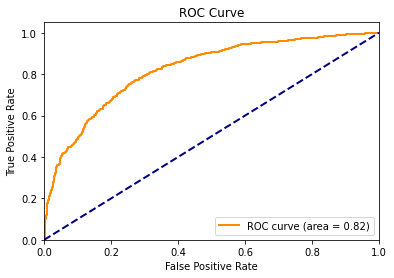

ROC AUC: 0.8223


In [56]:
# Graficar la curva ROC usando las variables existentes
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Calcular ROC AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)
print('ROC AUC:', round(roc_auc, 4))

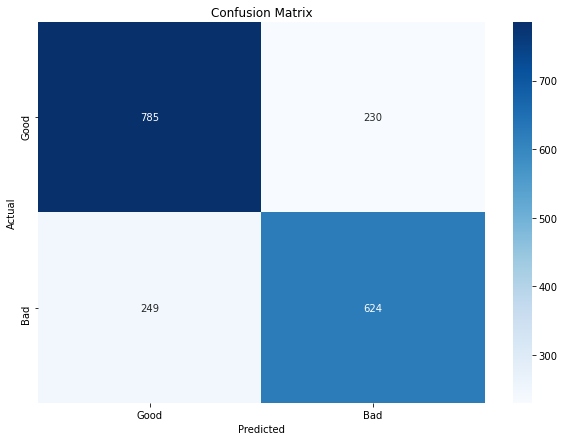

In [57]:

conf_matrix = confusion_matrix(y_test, y_pred_test)

# Dibujar la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Good', 'Bad'], yticklabels=['Good', 'Bad'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Explicabilidad del modelo

## Explicabilidad global

In [58]:
ebm_global = ebm_final.explain_global(name='EBM')
show(ebm_global)

<!-- http://127.0.0.1:7001/2521423889408/ -->

## Interpretabilidad local

In [59]:
X_test[:5]

,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,MaxDelq2PublicRecLast12M,...,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
0,69,256,6,117,11,1,1,100,-7,7,...,8,0,0,0,13,-8,2,-8,0,67
1,61,256,19,68,14,0,0,87,0,4,...,33,0,2,1,62,68,3,3,1,86
2,70,37,4,20,19,0,0,100,-7,7,...,20,0,3,3,42,73,2,2,1,50
3,73,255,16,100,40,0,0,100,-7,7,...,23,0,1,1,79,-8,18,1,13,80
4,83,398,3,118,29,0,0,100,-7,7,...,31,0,3,3,22,87,6,3,0,69


In [60]:
ebm_local = ebm_final.explain_local(X_test[:5], y_test[:5], name='EBM')
show(ebm_local, 0)

<!-- http://127.0.0.1:7001/2521494823600/ -->

## Modelos de caja negra

In [65]:
random_forest = RandomForestClassifier(random_state=RANDOM_STATE)

# Entrenar el modelo
random_forest.fit(X_train, y_train)

# Predecir en el conjunto de validación
y_pred_validation_rf = random_forest.predict(X_validation)

# Evaluar el rendimiento del modelo
validation_accuracy_rf = accuracy_score(y_validation, y_pred_validation_rf)
print('Validation accuracy (Random Forest):', validation_accuracy_rf)

Validation accuracy (Random Forest): 0.709


In [70]:
param_grid = {
    'n_estimators': [int(x) for x in np.linspace(start = 50, stop = 2000, num = 40)],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [10, 50, 100, 200, None]
}

RF_randomizedSearch = RandomForestClassifier()
randomized_search = RandomizedSearchCV(RF_randomizedSearch, param_grid, random_state=RANDOM_STATE, n_jobs=-1, n_iter = 100, scoring='accuracy')

randomized_search.fit(X_train, y_train)

best_params_rf = randomized_search.best_params_
print("Mejores hiperparámetros:", best_params_rf)
print("Mejor accuracy:", randomized_search.best_score_)

Mejores hiperparámetros: {'n_estimators': 1850, 'max_features': 'sqrt', 'max_depth': 100, 'criterion': 'gini'}
Mejor accuracy: 0.7298341938593694


Mejores hiperparámetros: {'n_estimators': 1500, 'max_features': 'log2', 'max_depth': 50, 'criterion': 'log_loss'}
Mejor accuracy: 0.7287508423402792

In [73]:
param_grid = {
    'n_estimators': [int(x) for x in np.linspace(start = 50, stop = 2000, num = 40)],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [10, 50, 100, 200, None]
}

RF_randomizedSearch = RandomForestClassifier()
randomized_search = RandomizedSearchCV(RF_randomizedSearch, param_grid, random_state=RANDOM_STATE, n_jobs=-1, n_iter = 500, scoring='accuracy')

randomized_search.fit(X_train, y_train)

best_params_rf = randomized_search.best_params_
print("Mejores hiperparámetros:", best_params_rf)
print("Mejor accuracy:", randomized_search.best_score_)

Mejores hiperparámetros: {'n_estimators': 600, 'max_features': 'log2', 'max_depth': 100, 'criterion': 'log_loss'}
Mejor accuracy: 0.730918504627176


In [74]:
param_grid = {
    'n_estimators': [int(x) for x in np.linspace(start = 50, stop = 2000, num = 40)],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [10, 50, 100, 200, None]
}

RF_gridSearch = RandomForestClassifier()
rf_grid_search = GridSearchCV(RF_gridSearch, param_grid, n_jobs=-1, scoring='accuracy')

rf_grid_search.fit(X_train, y_train)

best_params_rf = rf_grid_search.best_params_
print("Mejores hiperparámetros:", best_params_rf)
print("Mejor accuracy:", rf_grid_search.best_score_)

KeyboardInterrupt: 

In [68]:
# Predecir en el conjunto de prueba
y_pred_test_rf = random_forest.predict(X_test)

# Evaluar el rendimiento del modelo
test_accuracy_rf = accuracy_score(y_test, y_pred_test_rf)
print('Test accuracy (Random Forest):', test_accuracy_rf)

# Generar el informe de clasificación
report_rf = classification_report(y_test, y_pred_test_rf)
print(report_rf)

Test accuracy (Random Forest): 0.7367584745762712
              precision    recall  f1-score   support

         Bad       0.74      0.79      0.76      1015
        Good       0.73      0.68      0.71       873

    accuracy                           0.74      1888
   macro avg       0.74      0.73      0.73      1888
weighted avg       0.74      0.74      0.74      1888

